In [1]:
import pandas as pd
from sodapy import Socrata
import statsmodels.api as sm
import matplotlib.pyplot as plt

MY_APP_TOKEN = '<<Replace With your Token'
client = Socrata("data.ny.gov", app_token=MY_APP_TOKEN)

results = client.get("ah74-pg4w", limit=2400000)
full_df = pd.DataFrame.from_records(results)

In [2]:
print(full_df.groupby(['event_type']).size().sort_values(ascending=False).reset_index(name ='Count').describe())
print(full_df.groupby(['facility_name']).size().sort_values(ascending=False).reset_index(name ='Count').describe())

               Count
count    3314.000000
mean      724.187085
std     13677.771036
min         1.000000
25%         1.000000
50%         2.000000
75%        12.000000
max    517705.000000
              Count
count  25097.000000
mean      95.590589
std     1337.686588
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max    70270.000000


In [3]:
full_df['year_of_date'] = pd.to_datetime(full_df['create_time'])
full_df['year'] = full_df['year_of_date'].dt.year
full_df['day_of_week'] = full_df['year_of_date'].dt.weekday_name
full_grp_df = full_df.sort_values('year', ascending=True).groupby(['year']).size().reset_index(name = 'Yearly_Count')
full_cnt_df = full_grp_df[['year','Yearly_Count']]
full_year_df = full_cnt_df.set_index('year')
full_day_df = full_df.sort_values('day_of_week', ascending=True).groupby(['day_of_week']).size().reset_index(name = 'Day_Count')
full_day_cnt_df = full_day_df[['day_of_week','Day_Count']]
full_dcnt_df = full_day_cnt_df.set_index('day_of_week')
print(full_dcnt_df)

             Day_Count
day_of_week           
Friday          418791
Monday          394100
Saturday        164390
Sunday          147434
Thursday        432269
Tuesday         417861
Wednesday       425155


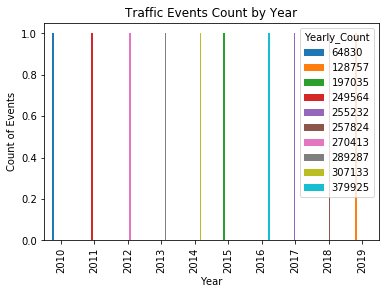

In [4]:
data = pd.crosstab(full_cnt_df.year, full_cnt_df.Yearly_Count).plot(kind='bar')
plt.title('Traffic Events Count by Year')
plt.xlabel('Year')
plt.ylabel('Count of Events')
plt.savefig('traffic_evnt_cnt')
plt.show()

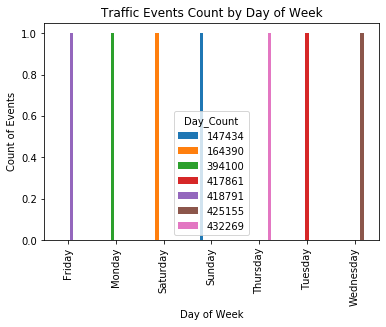

In [5]:
day_cnt_data = pd.crosstab(full_day_cnt_df.day_of_week, full_day_cnt_df.Day_Count).plot(kind='bar')
plt.title('Traffic Events Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Events')
plt.savefig('traffic_evnt_daily_cnt')
plt.show()